<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1218/98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Dec 21 02:27:52 UTC 2020


In [2]:
X1 = [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 
      3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 
      4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 
      3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 
      4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 
      6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 
      5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 
      5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 
      6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 
      5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]

Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

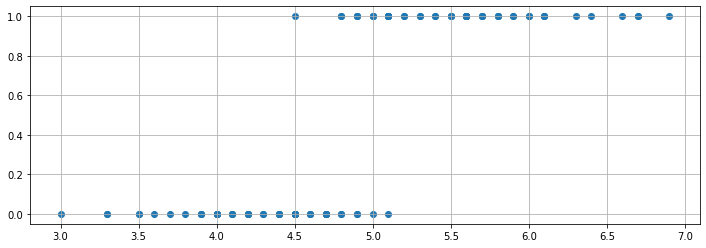

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X1, Y)
plt.grid()
plt.show()

In [4]:
# Python の List を Numpy の Array に変換しておきましょう。
import numpy as np
X1 = np.array(X1)
Y = np.array(Y)

In [5]:
import numpy as np
def func1(X, a, b): # シグモイド曲線
    f = a + b * X
    return 1. / (1. + np.exp(-f))

In [6]:
func1(X1, 1, 1)

array([0.99666519, 0.99592986, 0.99726804, 0.99330715, 0.99631576,
       0.99592986, 0.99666519, 0.98661308, 0.99631576, 0.99260846,
       0.98901306, 0.9945137 , 0.99330715, 0.99666519, 0.9900482 ,
       0.99550373, 0.99592986, 0.9939402 , 0.99592986, 0.99260846,
       0.99698158, 0.99330715, 0.99726804, 0.99666519, 0.9950332 ,
       0.99550373, 0.99698158, 0.99752738, 0.99592986, 0.98901306,
       0.99183743, 0.9909867 , 0.99260846, 0.99776215, 0.99592986,
       0.99592986, 0.99666519, 0.99550373, 0.9939402 , 0.99330715,
       0.99550373, 0.99631576, 0.99330715, 0.98661308, 0.9945137 ,
       0.9945137 , 0.9945137 , 0.9950332 , 0.98201379, 0.9939402 ,
       0.99908895, 0.99776215, 0.99899323, 0.99864148, 0.99888746,
       0.9994998 , 0.99592986, 0.99932492, 0.99888746, 0.99917558,
       0.99776215, 0.99816706, 0.99849882, 0.99752738, 0.99776215,
       0.99816706, 0.99849882, 0.99954738, 0.99962939, 0.99752738,
       0.9987706 , 0.99726804, 0.99954738, 0.99726804, 0.99877

In [7]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,X1,Y) # poptは最適推定値、pcovは共分散
popt

array([-47.16056569,   9.6947444 ])

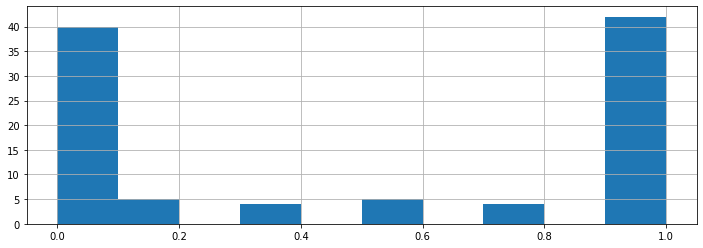

In [12]:
plt.figure(figsize=(12,4))
plt.hist(func1(X1, popt[0], popt[1]))
plt.grid()
plt.show()

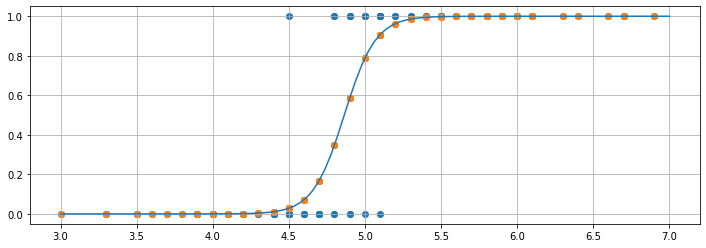

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X1, Y)
x = np.linspace(3, 7, 100)
plt.plot(x, func1(x, popt[0], popt[1]))
plt.scatter(X1, func1(X1, popt[0], popt[1]))
plt.grid()
plt.show()

In [14]:
TP=[]
TN=[]
FP=[]
FN=[]

for i in range(0,len(X1)):
  a=func1(X1[i], popt[0], popt[1])
  if a<0.5:
    a=0
  else:
    a=1

  if a==Y[i]:
    if a==1:
      TP.append(func1(X1[i], popt[0], popt[1]))
    else:
      TN.append(func1(X1[i], popt[0], popt[1]))
  else:
    if a==1:
      FP.append(func1(X1[i], popt[0], popt[1]))
    else:
      FN.append(func1(X1[i], popt[0], popt[1]))

Accuracy:  0.93


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


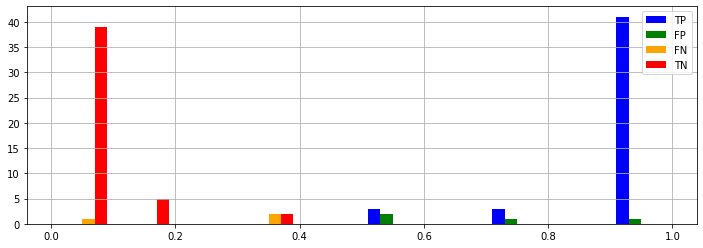

In [15]:
print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
plt.figure(figsize=(12,4))
plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
plt.legend()
plt.grid()
plt.show()

In [16]:
X2 = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 
      1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 
      1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 
      1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 
      1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 
      2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 
      2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 
      2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 
      1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 
      2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]

X = np.array([X1, X2])

In [18]:
def func2(X, a, b, c): # シグモイド曲線
    f = a + b * X[0] + c * X[1]
    return (1. / (1. + np.exp(-f)) )

In [19]:
popt, pcov = curve_fit(func2, X, Y) # poptは最適推定値、pcovは共分散
popt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([-34.73855708,   4.53539757,   7.68378878])

[0.9999915665847798, 0.9521735836623825, 0.9997131444945154, 0.9889092279654462, 0.999790606138451, 0.9999880051759733, 0.999531388341532, 0.9954928308379075, 0.9999946416015444, 0.9772360058812335, 0.9801256094085342, 0.9982424686325446, 0.9646343581063656, 0.9989236080168026, 0.9990628824295364, 0.9826549243687973, 0.9999964655240202, 0.9999993382652408, 0.9998471534587037, 0.9454461470493615, 0.9999835666976299, 0.7884672155457904, 0.999289737571113, 0.9981755455729802, 0.7031140543469128, 0.7884672155457904, 0.9988825922650171, 0.9793830825017767, 0.9994617057609108, 0.9999359360664124, 0.9994814755122557, 0.8048635368117512, 0.9999750866616675, 0.999888431742038, 0.9826549243687973, 0.7031140543469128, 0.9972366551251988, 0.999888431742038, 0.9976818956834895, 0.9521735836623825, 0.9999382899963148, 0.9999671222333557, 0.9985258882786439, 0.926738042805157, 0.9854152671853906, 0.9994043753138675, 0.9022775046528985] [0.0650775349955674, 0.057130765489137196, 0.27102550720155627, 0

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


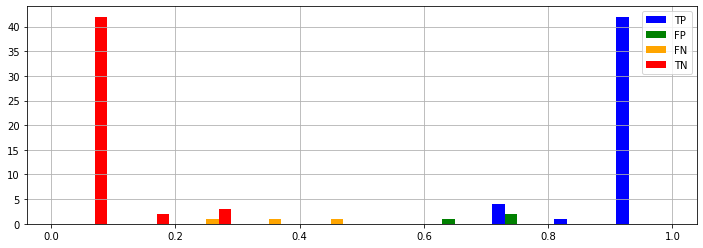

In [21]:
TP=[]
TN=[]
FP=[]
FN=[]

for i in range(0,len(X[0])):
  a=func2([X[0][i],X[1][i]], popt[0], popt[1], popt[2])
  # print(a)
  if a<0.5:
    a=0
  else:
    a=1

  if a==Y[i]:
    if a==1:
      TP.append(func2([X[0][i],X[1][i]], popt[0], popt[1], popt[2]))
    else:
      TN.append(func2([X[0][i],X[1][i]], popt[0], popt[1], popt[2]))
  else:
    if a==1:
      FP.append(func2([X[0][i],X[1][i]], popt[0], popt[1], popt[2]))
    else:
      FN.append(func2([X[0][i],X[1][i]], popt[0], popt[1], popt[2]))

print(TP,TN,FP,FN)

print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
plt.figure(figsize=(12,4))
plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
plt.legend()
plt.grid()
plt.show()

In [22]:
N = 1000
x1_axis = np.linspace(min(X[0]), max(X[0]), N)
x2_axis = np.linspace(min(X[1]), max(X[1]), N)
x1_grid, x2_grid = np.meshgrid(x1_axis, x2_axis)
x_mesh = np.c_[np.ravel(x1_grid), np.ravel(x2_grid)]

In [23]:
y_plot = func2(x_mesh.T, popt[0], popt[1], popt[2]).reshape(x1_grid.shape)

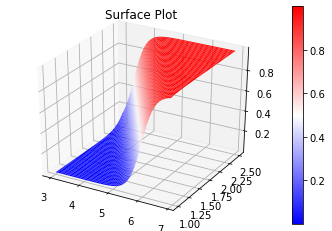

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1_grid, x2_grid, y_plot, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")
fig.show()

In [25]:
X3 = [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 
      5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 
      5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 
      5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 
      5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 
      6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 
      6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 
      6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 
      7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 
      6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

X4 = [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 
      2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 
      3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 
      2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 
      2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 
      3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 
      3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 
      3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 
      2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 
      3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]

X = np.array([X1, X2, X3, X4])

In [26]:
import numpy as np
def func(X, *params):
    f = np.zeros_like(X[0])
    for i, param in enumerate(params):
        if i == 0:
            f = f + param
        else:
            f = f + np.array(param * X[i - 1])
    return 1. / (1. + np.exp(-f))

In [27]:
popt, pcov = curve_fit(func,X,Y,p0=[1,1,1,1,1]) # poptは最適推定値、pcovは共分散
popt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


array([-1280.82222672,   325.49114886,   343.20730877,   -76.284259  ,
        -143.71161942])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999987, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999604519, 0.9999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999834685522545, 1.0, 1.0, 1.0, 1.0, 0.9999715698328899, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1.501847080235522e-115, 4.875592744938411e-109, 8.091542605023157e-63, 1.5367770249047645e-123, 2.9937150002828975e-73, 1.0803577494316484e-90, 8.645704206441291e-69, 1.4321060135649827e-253, 1.2921197960531777e-112, 8.50547183416242e-138, 1.2024282904772476e-203, 2.1275192320678117e-122, 1.4031325978729048e-178, 5.217040060539593e-67, 7.622995471605496e-221, 8.895879856559845e-142, 4.7263543081886446e-70, 5.039466927071677e-189, 5.335280645983069e-40, 2.782824831835534e-183, 2.379844160715726e-05, 1.2651137177202877e-174, 1.7132530305419902e-05, 1.4064763447195946e-90, 2.1358284663918408e-148, 3.1877812579052083e-132, 8.012325208210703e-70, 5.270125650504311e-06, 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


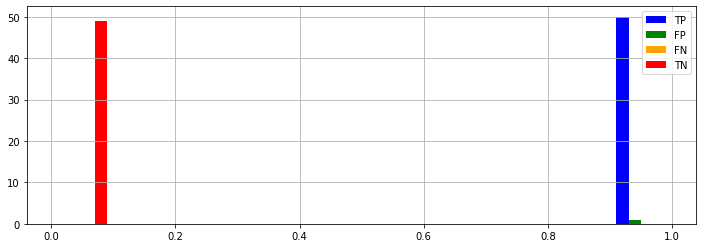

In [28]:
TP=[]
TN=[]
FP=[]
FN=[]

A = func(X[0:4], popt[0] , popt[1],popt[2],popt[3],popt[4])
b=0
i=0
for a in A:
  if a<0.5:
    b=0
  else:
    b=1

  if b==Y[i]:
    if b==1:
      TP.append(a)
    else:
      TN.append(a)
  else:
    if b==1:
      FP.append(a)
    else:
      FN.append(a)
  i+=1
print(TP,TN,FP,FN)

print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
plt.figure(figsize=(12,4))
plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
plt.legend()
plt.grid()
plt.show()

In [32]:
def mlp(X, *params):
    h01, h02, h03, h04, h0b = params[0], params[1], params[2], params[3], params[4]
    h11, h12, h13, h14, h1b = params[5], params[6], params[7], params[8], params[9]
    h21, h22, h23, h24, h2b = params[10], params[11], params[12], params[13], params[14]

    o01, o02, o03, o0b = params[15], params[16], params[17], params[18]

    h0 = 1. / (1. + np.exp(-(h01 * X[0] + h02 * X[1] + h03 * X[2] + h04 * X[3] + h0b)))
    h1 = 1. / (1. + np.exp(-(h11 * X[0] + h12 * X[1] + h13 * X[2] + h14 * X[3] + h1b)))
    h2 = 1. / (1. + np.exp(-(h21 * X[0] + h22 * X[1] + h23 * X[2] + h24 * X[3] + h2b)))

    o0 = 1. / (1. + np.exp(-(o01 * h0 + o02 * h1 + o03 * h2 + o0b)))

    return o0

In [60]:
# mlp は実は初期値依存性が非常に大きく不安定
popt, pcov = curve_fit(mlp,X,Y,p0=[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]) # poptは最適推定値、pcovは共分散
popt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([-5.38333668e+00, -5.70782222e+00,  1.25282115e+00,  2.38964510e+00,
        1.98223269e+01, -1.45241399e+04, -4.00962553e+04, -1.12915199e+04,
       -2.74333733e+04, -4.72670800e+04, -2.30603381e+05, -9.48756813e+05,
       -1.50120329e+05, -3.92201735e+05, -5.69890147e+05, -4.35754751e+02,
       -3.09861009e-01, -3.09852237e-01,  8.54285378e+01])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999903126, 0.9999999999999989, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999974405432813, 1.0, 1.0, 1.0, 1.0, 0.9999965900157197, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1.998880682796983e-143, 5.849866351676977e-141, 1.6626324323220703e-99, 7.617909210546266e-146, 2.44401580614644e-113, 1.702839657044547e-130, 6.1803052320360474e-108, 8.05409832990711e-153, 2.125341034402713e-142, 9.633081003281754e-149, 1.572401588878642e-152, 1.5422108960899523e-145, 5.557403190359422e-152, 1.124908959260321e-105, 1.0796621874872796e-152, 2.770813300962796e-149, 9.569684863110506e-110, 2.8118553560572775e-152, 4.2336263374712625e-61, 3.948657166529996e-152, 1.1554620088509255e-05, 7.788037051405828e-152, 9.650616009530231e-06, 2.1144348322185947e-130, 4.427204764524929e-150, 9.469674999889455e-148, 4.062920973101169e-109, 2.861467409421789e-06, 7

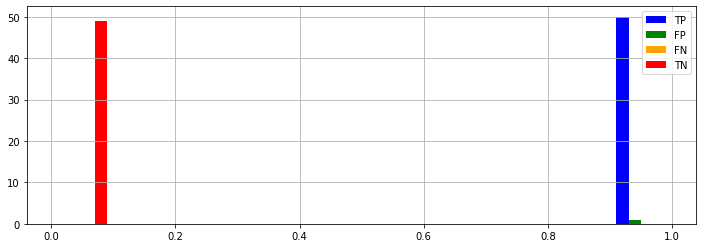

In [57]:
TP=[]
TN=[]
FP=[]
FN=[]

A = mlp(X, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8],popt[9],popt[10],popt[11],popt[12],popt[13],popt[14],popt[15],popt[16],popt[17],popt[18])
b=0
i=0
for a in A:
  if a<0.5:
    b=0
  else:
    b=1

  if b==Y[i]:
    if b==1:
      TP.append(a)
    else:
      TN.append(a)
  else:
    if b==1:
      FP.append(a)
    else:
      FN.append(a)
  i+=1
print(TP,TN,FP,FN)

print("Accuracy: ", len(TP + TN) / len(TP + FP + FN + TN))
plt.figure(figsize=(12,4))
plt.hist([TP, FP, FN, TN], label=['TP', 'FP', 'FN', 'TN'], color=['blue', 'green', 'orange', 'red'])
plt.legend()
plt.grid()
plt.show()

In [58]:
!date

Mon Dec 21 02:49:31 UTC 2020
